In [40]:
# svr tries to fit as many points as possible on the street while limiting margin violations
# width of street -> controlled by hyper paramter
# svr performs linear regression in a higher dimensional space 

# collect a training set (X,Y)
# choose kernel and its parameters as well as any regulzn method
# form correlation matrix
# train your machine , exactly or approximately, to get contradiction coeff a
# use those coeff , create your estimator f(X,a,x) = y

# choose kernel -> gaussian 
# correlation matrix -> Krow,col -> exp(sum(Bi*(Xrow-Xcol)^2))+epsilon
# K*a=y 
# y -> vector of values corresponding to train set
# K -> correlation matrix
# a -> set of unknowns we need to find
# a = inv(K)*y
# a -> found -> form estimator
# y(pred) for some x -> find K
# y(pred)=a*K
# in svr our goal is to make sure that errors do not exceed the threshold


In [41]:
# svm -> classfn , regressn
# first understanding for claasifcn ->
# using logistic -> classify binary category -> in svm -> create 2 more lines passing through nearest points to hper plane
# the lines of svm -> support vectors / marginal planes 
# dist between marginal planes and hyper planes should be high 
# lets say hyperplane -> ax+by+c=0
# aim-> draw hyper,margin planes with distance between hyper and margin very high / distance bwteen both margins very high
# for a strt line -> pt below line -> f(pt)<0 & for pt above -> f(pt)>0
# lets say -> margin be -> ax+by+(c+k)=0 and ax+by+(c-k)=0  -> we want dist to be max 
# dist max -> maximizie 2*k/|m| (for y=mx+c) ;  constraints -> if(mx+c>=k)-> y=+ve  else -> y=-ve
# for all accurate datapoints -> y*(mx+b)>=1 -> final constraint
# from 2*k/|m| -> minimize -> |m|/2*k -> final cost function
# 2 hyper-parameters also added in cost function -> |m|/2*k + C*(sum(eeta)) -> C-> how many points we can avoid missclassification -> max number of missclassified points -> itne erros allowed h -> overfitting bhi nhi hoega fir
# eeta -> summation of dist of missclassified points from hyperplane 
# svr -> first best fit line bnti h ; secondly marginal planes ; lets say dist bw hyper and margin be epsilon 
# cost fn toh same; marginal ki eqns -> mx+(c+epsilon) ; dist between pred and actual should be less than epsilon -> such points with less than epsilon are good -> abs(y-y(pred))<= epsilon
# for points outside marginal planes -> cost fn -> minimize(|m|/2 + C(sum(eeta))) -> eeta dist between marginal -> constraint -> |yi-yi(pred)|<= epsilon+|eeta|i
# epsilon ->dist bw marg and hyper ; eeta -> dist between pt and margn

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2:3].values

In [43]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X=sc_X.fit_transform(X)
Y=sc_Y.fit_transform(Y)

In [44]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
# non-linear kernel -> rbf
regressor.fit(X,Y)

c:\Users\abhinav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

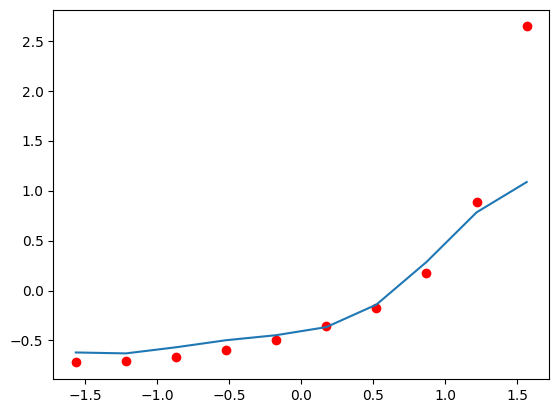

In [45]:
plt.scatter(X,Y,color="red")
plt.plot(X,regressor.predict(X))
plt.show()

In [51]:
y_pred=sc_Y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))])
print(y_pred)

[[170370.0204065]]
